<a href="https://colab.research.google.com/github/Madhav2008/Project113/blob/main/Project113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Story

##Uploading Required Files

In [ ]:
from google.colab import files
datatoload = files.upload()

Saving 1.csv to 1.csv


##Importing Different Modules And Creating Figure

In [ ]:
import plotly.express as px
import csv
import pandas as pd
import statistics

df = pd.read_csv("1.csv")
fig = px.scatter(df , y = "quant_saved", color = "rem_any")
fig.show()

##Creating Figure For Reminded People And Not Reminded People

In [ ]:
import plotly.graph_objects as go

file = open("1.csv", newline="")
reader = csv.reader(file)
savingsdata = list(reader)
savingsdata.pop(0)

totalentries = len(savingsdata)
totalpeoplegivenreminder = 0

for data in savingsdata:
  if int(data[3]) == 1:
    totalpeoplegivenreminder = totalpeoplegivenreminder + 1

fig = go.Figure(go.Bar(x = ["reminded" , "notreminded"], y = [totalpeoplegivenreminder, (totalentries - totalpeoplegivenreminder)]))
fig.show()

##Printing Mean, Mode And Median Of Savings

In [ ]:
allsavings = []

for data in savingsdata:
  allsavings.append(float(data[0]))

print(f"Mean Of Savings - {statistics.mean(allsavings)}")
print(f"Mode Of Savings - {statistics.mode(allsavings)}")
print(f"Median Of Savings - {statistics.median(allsavings)}")

Mean Of Savings - 85.32780331328739
Mode Of Savings - 0.0
Median Of Savings - 39.2724


##Printing Mean, Mode And Median For People Who Were Reminded To Save And Mean, Mode And Median For People Who Were Not Reminded To Save

In [ ]:
remindedsavings = []
notremindedsavings = []

for data in savingsdata:
  if int(data[3]) == 1:
    remindedsavings.append(float(data[0]))
  else:
    notremindedsavings.append(float(data[0]))

print("Results For People Who Were Reminded To Save")
print(f"Mean Of Savings - {statistics.mean(remindedsavings)}")
print(f"Mode Of Savings - {statistics.mode(remindedsavings)}")
print(f"Median Of Savings - {statistics.median(remindedsavings)}")
print(" ")
print("Results For People Who Were Not Reminded To Save")
print(f"Mean Of Savings - {statistics.mean(notremindedsavings)}")
print(f"Mode Of Savings - {statistics.mode(notremindedsavings)}")
print(f"Median Of Savings - {statistics.median(notremindedsavings)}")

Results For People Who Were Reminded To Save
Mean Of Savings - 82.56940908263547
Mode Of Savings - 0.0
Median Of Savings - 39.2724
 
Results For People Who Were Not Reminded To Save
Mean Of Savings - 89.67095185226523
Mode Of Savings - 0.0
Median Of Savings - 36.0475


##First Printing Standard Deviation Of All The Data, Then Printing Standard Deviation Of People Who Were Reminded And Then Printing Standard Deviation Of People Who Were Not Reminded

In [ ]:
print(f"Standard Deviation Of All The Data - {statistics.stdev(allsavings)}")
print(f"Standard Deviation Of People Who Were Reminded - {statistics.stdev(remindedsavings)}")
print(f"Standard Deviation Of People Who Were Not Reminded - {statistics.stdev(notremindedsavings)}")

Standard Deviation Of All The Data - 196.75453011909315
Standard Deviation Of People Who Were Reminded - 173.24866414440817
Standard Deviation Of People Who Were Not Reminded - 228.875050299707


##Printing The Correlation Between Age And Savings Of The Peole

In [ ]:
import numpy as np

age = []
savings = []

for data in savingsdata:
  if float(data[5]) != 0:
    age.append(float(data[5]))
    savings.append(float(data[0]))

correlation = np.corrcoef(age, savings)
print(f"Correlation Is - {correlation[0, 1]}")

Correlation Is - 0.036634479759854614


##Creating Distplot For Quant saved Data

In [ ]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

##Creating Boxplot

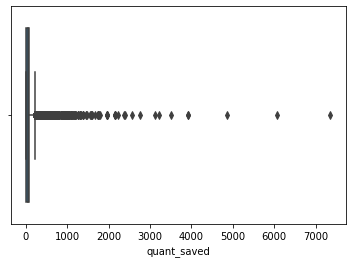

In [ ]:
import seaborn as sns

sns.boxplot(data = df, x = df["quant_saved"])

##Finding The Upper Whisker And The Lower Whisker

In [ ]:
q1 = df["quant_saved"].quantile(0.25)
q2 = df["quant_saved"].quantile(0.75)
iqr = q2 - q1
print(q1, q2, iqr)
lowerwhisker = q1 - 1.5 * iqr
upperwhisker = q2 + 1.5 * iqr
print(lowerwhisker, upperwhisker)
newdf = df[df["quant_saved"] < upperwhisker]

2.2840000000000003 86.514 84.22999999999999
-124.06099999999998 212.85899999999998


##Finding The Mean, Mode, Median And The Standard Deviation Of All The Savings And Then Creating Its Distplot

In [ ]:
allsavings = newdf["quant_saved"].tolist()
print(f"Mean Of Savings - {statistics.mean(allsavings)}")
print(f"Mode Of Savings - {statistics.mode(allsavings)}")
print(f"Median Of Savings - {statistics.median(allsavings)}")
print(f"Standard Deviation Of Savings - {statistics.stdev(allsavings)}")
fig = ff.create_distplot([newdf["quant_saved"].tolist()], ["Savings"], show_hist = False)
fig.show()

Mean Of Savings - 46.200519389818794
Mode Of Savings - 0.0
Median Of Savings - 36.0475
Standard Deviation Of Savings - 50.866871917288634


##Taking Randomly (1 to 100) 1000 Times And Then Creating Its Distplot 

In [ ]:
import random

samplingmeanlist = []

for i in range(1000):
  templist = []

  for j in range(100):
    templist.append(random.choice(allsavings))

  samplingmeanlist.append(statistics.mean(templist))

meansampling = statistics.mean(samplingmeanlist)
fig = ff.create_distplot([samplingmeanlist], ["Savings(Sampling)"], show_hist = False)
fig.show()

## First Finding The Mean Of Population And Mean Of Sampling Distribution And Then Finding The Standard Deviation Of Population And Standard Deviation Of Sampling Distribution

In [ ]:
print(f"Mean Of Population - {statistics.mean(allsavings)}")
print(f"Mean Of Sampling Distribution - {meansampling}")
print(f"Standard Deviation Of Population - {statistics.stdev(allsavings)}")
print(f"Standard Deviation Of Sampling Distribution - {statistics.stdev(samplingmeanlist)}")

Mean Of Populattion - 46.200519389818794
Mean Of Sampling Distribution - 46.25028107117611
Standard Deviation Of Population - 50.866871917288634
Standard Deviation Of Sampling Distribution - 5.0593857422310045


##Finding The Correlation Between Age And Savings

In [ ]:
import numpy as np

tempdf = newdf[newdf.age != 0]
age = tempdf["age"].tolist()
savings = tempdf["quant_saved"].tolist()
correlation = np.corrcoef(age, savings)
print(correlation[0,1])

0.08561544120342093


##Finding The Outliers Of Reminded Dataframe And Not Reminded Dataframe

In [ ]:
remindeddf = newdf.loc[newdf["rem_any"] == 1]
notremindeddf = newdf.loc[newdf["rem_any"] == 0]
print(remindeddf.head())
print(notremindeddf.head())

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


##Creating The Distplot For Not Reminded Dataframe

In [ ]:
fig = ff.create_distplot([notremindeddf["quant_saved"].tolist()], ["Savings(Not Reminded)"], show_hist = False)
fig.show()

##Creating The Distplot For Sampling Mean List Not Reminded

In [ ]:
notremindedsavings = notremindeddf["quant_saved"].tolist()

samplingmeanlistnotreminded = []

for i in range(1000):
  templist = []

  for j in range(100):
    templist.append(random.choice(notremindedsavings))

  samplingmeanlistnotreminded.append(statistics.mean(templist))

meansamplingnotreminded = statistics.mean(samplingmeanlistnotreminded)
stdevsamplingnotreminded = statistics.stdev(samplingmeanlistnotreminded)
fig = ff.create_distplot([samplingmeanlistnotreminded], ["Savings(Sampling)"], show_hist = False)
fig.show()

##Creating The Distplot For Sampling Mean List Reminded

In [ ]:
remindedsavings = remindeddf["quant_saved"].tolist()

samplingmeanlistreminded = []

for i in range(1000):
  templist = []

  for j in range(100):
    templist.append(random.choice(remindedsavings))

  samplingmeanlistreminded.append(statistics.mean(templist))

meansamplingreminded = statistics.mean(samplingmeanlistreminded)
stdevsamplingreminded = statistics.stdev(samplingmeanlistreminded)
fig = ff.create_distplot([samplingmeanlistreminded], ["Savings(Sampling)"], show_hist = False)
fig.show()

##Finding The Z-Score

In [ ]:
zscore = (meansamplingreminded - meansamplingnotreminded) / stdevsamplingnotreminded
print(zscore)

0.8038776995625002
